In [3]:
#Importing Required Libraries
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import cufflinks as cf
from pandas_datareader import data
from pandas.tseries.frequencies import to_offset
import csv

from scipy.optimize import brute
plt.style.use("seaborn")

In [4]:
#training
train_set_start='1992-06-01'
train_set_end='2002-05-31'
#validation
val_set_start='2002-06-01'
val_set_end='2012-05-31'
#Test
test_set_start='2012-06-01'
test_set_end='2022-05-31'

In [5]:
#MACD is going to be the core of the strategy

In [6]:
#Class created
from MACDBacktester_2 import MACDBacktester_2 as MACD_2
from RSIBacktester_2 import RSIBacktester_2 as RSI_2
from SOBacktester_2 import SOBacktester_2 as SO_2
import combining_two_indicators

## All SO + RSI


In [8]:
SO_2_opt_all = SO_2("^GSPC",periods = 4, D_mw = 4, 
                     start = train_set_start, end = test_set_end, tc = 0)

data_SO_all = SO_2_opt_all.test_strategy()[4]


RSI_opt_all = RSI_2("^GSPC", periods = 3, rsi_upper = 58, rsi_lower = 39, 
                     start = train_set_start, end = test_set_end, tc = 0)
data_RSI_all = RSI_opt_all.test_strategy()[4]

comb_SO_opt_RSI_opt_2 = combining_two_indicators.combining_two_indicators(data_SO_all,data_RSI_all,0)
comb_SO_opt_RSI_opt_2_data = comb_SO_opt_RSI_opt_2[4]

[*********************100%***********************]  1 of 1 completed
Strategy Performance: 0.254
Hold and Buy Performance: 10.141
Strategy Maximun Drawdown: 0.971
Hold and Buy Drawdown: 0.568
parameters: 4, 4
[*********************100%***********************]  1 of 1 completed
Strategy Performance: 8.848
Hold and Buy Performance: 10.03
Strategy Maximun Drawdown: 0.275
Hold and Buy Drawdown: 0.568
parameters: 3, 58, 39
Strategy Combined Performance: 1.254
Hold and Buy Performance: 10.211
Strategy Combined Maximun Drawdown: 0.531
Hold and Buy Drawdown: 0.568




C:\Users\pcalatayud\Desktop\jupyter\TFM\RSIBacktester_2.py:71: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only



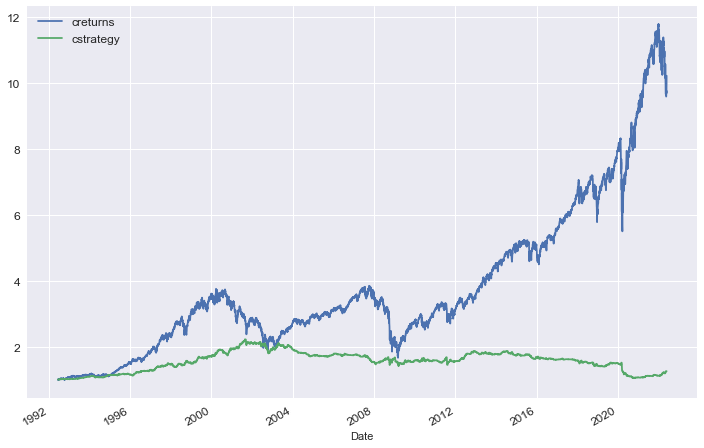

In [9]:
comb_SO_opt_RSI_opt_2_data[["creturns", "cstrategy"]].plot(figsize = (12, 8), fontsize = 12)
plt.legend(fontsize = 12)
plt.show()

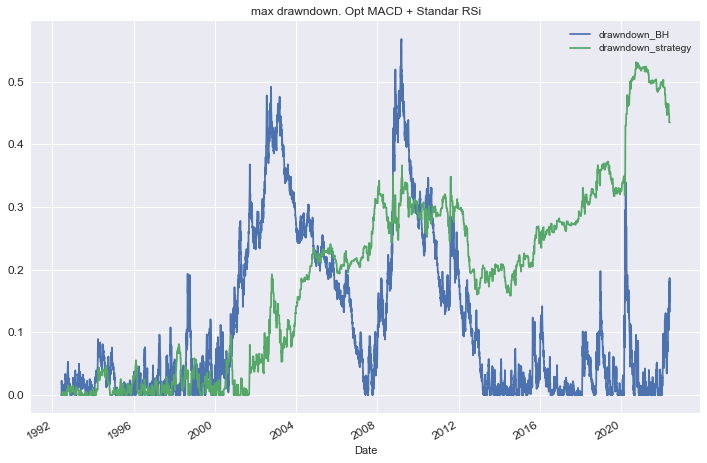

In [10]:
comb_SO_opt_RSI_opt_2_data[["drawndown_BH","drawndown_strategy"]].dropna().plot(figsize = (12, 8), title = "max drawndown. Opt MACD + Standar RSi", fontsize = 12)
plt.rc('legend',fontsize=20) # using a size in points
plt.show()

In [11]:
comb_SO_opt_RSI_opt_2_data["drawndown_BH"].max()

0.5677538774277292

In [12]:
comb_SO_opt_RSI_opt_2_data["drawndown_strategy"].max()

0.5307819924554642

In [13]:
comb_SO_opt_RSI_opt_2

(1.254,
 10.211,
 0.531,
 0.568,
              returns  position_core  position_oscillator  position_comb  \
 Date                                                                      
 1992-06-11  0.004410              1                    1              1   
 1992-06-12  0.001734              1                    0              0   
 1992-06-15  0.001293              1                   -1              0   
 1992-06-16 -0.004813             -1                    1              0   
 1992-06-17 -0.014953             -1                    1              0   
 ...              ...            ...                  ...            ...   
 2022-05-23  0.018385              1                   -1              0   
 2022-05-24 -0.008154              1                   -1              0   
 2022-05-25  0.009406              1                   -1              0   
 2022-05-26  0.019688              1                   -1              0   
 2022-05-27  0.024441              1                   

## All SO + MACD

In [14]:
MACD_opt_test = MACD_2("^GSPC", EMA_S = 19, EMA_L = 24, signal_mw = 4, start = train_set_start, end = test_set_end, tc = 0)
data_MACD_test = MACD_opt_test.test_strategy()[4]

SO_opt_test = SO_2("^GSPC", periods = 4 ,D_mw = 4, start = train_set_start, end = test_set_end, tc = 0)
data_SO_test = SO_opt_test.test_strategy()[4]

comb_SO_opt_MACD_opt_2 = combining_two_indicators.combining_two_indicators(data_MACD_test,data_SO_test,0)
comb_SO_opt_MACD_opt_2_data = comb_SO_opt_MACD_opt_2[4]

[*********************100%***********************]  1 of 1 completed
Strategy Performance: 0.356
Hold and Buy Performance: 10.135
Strategy Maximun Drawdown: 0.763
Hold and Buy Drawdown: 0.568
parameters: 19, 24, 4


C:\Users\pcalatayud\Desktop\jupyter\TFM\MACDBacktester_2.py:72: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only



[*********************100%***********************]  1 of 1 completed
Strategy Performance: 0.254
Hold and Buy Performance: 10.141
Strategy Maximun Drawdown: 0.971
Hold and Buy Drawdown: 0.568
parameters: 4, 4
Strategy Combined Performance: 0.3
Hold and Buy Performance: 10.038
Strategy Combined Maximun Drawdown: 0.881
Hold and Buy Drawdown: 0.568




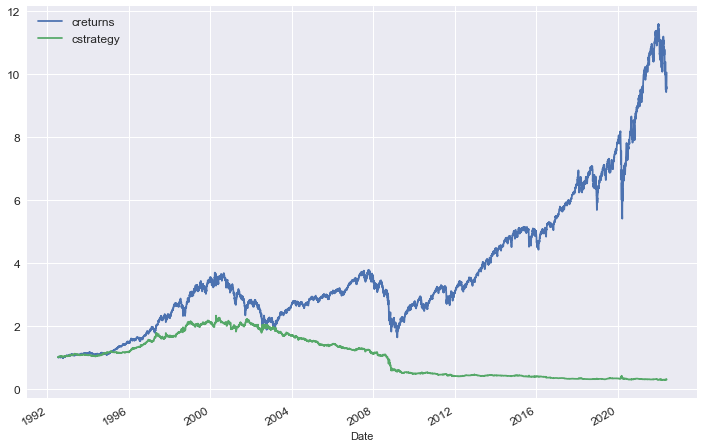

In [17]:
comb_SO_opt_MACD_opt_2_data[["creturns", "cstrategy"]].plot(figsize = (12, 8), fontsize = 12)
plt.legend(fontsize = 12)
plt.show()

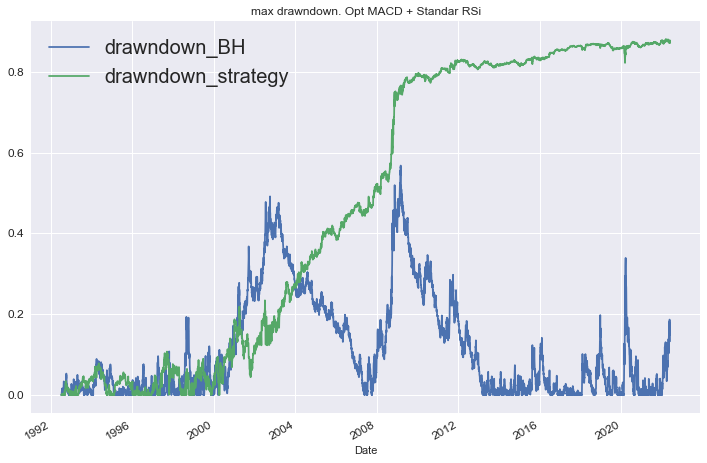

In [18]:
comb_SO_opt_MACD_opt_2_data[["drawndown_BH","drawndown_strategy"]].dropna().plot(figsize = (12, 8), title = "max drawndown. Opt MACD + Standar RSi", fontsize = 12)
plt.rc('legend',fontsize=20) # using a size in points
plt.show()

In [21]:
comb_SO_opt_MACD_opt_2_data["drawndown_BH"].max()

0.5677538774277291

In [22]:
comb_SO_opt_MACD_opt_2_data["drawndown_strategy"].max()

0.8808427043254938

## All SO 

In [26]:
data_SO_all = SO_2_opt_all.test_strategy()

Strategy Performance: 0.254
Hold and Buy Performance: 10.141
Strategy Maximun Drawdown: 0.971
Hold and Buy Drawdown: 0.568
parameters: 4, 4


In [27]:
data_SO_all=data_SO_all[4]

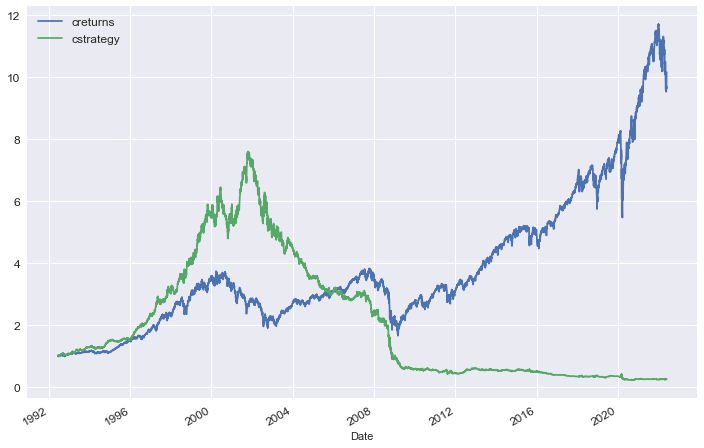

In [28]:
data_SO_all[["creturns", "cstrategy"]].plot(figsize = (12, 8), fontsize = 12)
plt.legend(fontsize = 12)
plt.show()

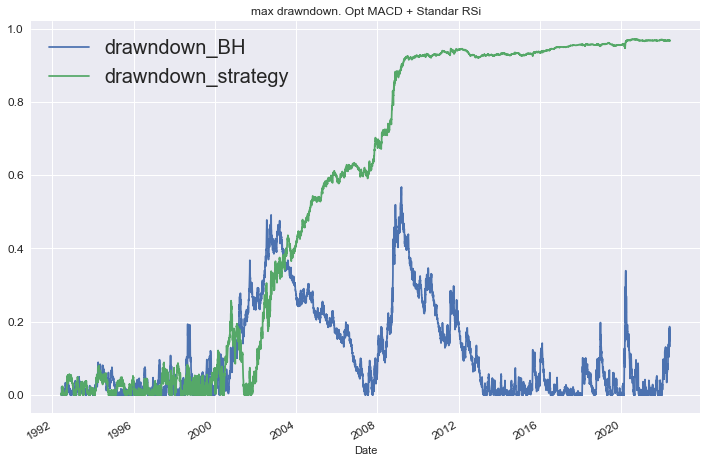

In [29]:
data_SO_all[["drawndown_BH","drawndown_strategy"]].dropna().plot(figsize = (12, 8), title = "max drawndown. Opt MACD + Standar RSi", fontsize = 12)
plt.rc('legend',fontsize=20) # using a size in points
plt.show()